In [67]:
#Importing Packages
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [68]:
#open data 
FTSE100 = pd.read_csv('/content/drive/MyDrive/Stock Data/FTSE100_R.csv')
FTSE100 = FTSE100.set_index(pd.DatetimeIndex(FTSE100['Date'].values))
FTSE100

,Date,Open Price,Close Price,High Price,Low Price,Volume
2009-01-02,02-Jan-09,4434.20,4561.80,4561.80,4430.00,407295392
2009-01-05,05-Jan-09,4561.80,4579.60,4618.10,4520.80,836675968
2009-01-06,06-Jan-09,4579.60,4638.90,4675.70,4562.00,1037315904
2009-01-07,07-Jan-09,4638.90,4507.50,4638.90,4478.00,1060111232
2009-01-08,08-Jan-09,4507.50,4505.40,4514.70,4410.50,924352384
...,...,...,...,...,...,...
2021-10-25,25-Oct-21,7204.55,7222.82,7247.53,7204.55,589120128
2021-10-26,26-Oct-21,7222.82,7277.62,7281.17,7222.82,670406912
2021-10-27,27-Oct-21,7277.62,7253.27,7280.45,7247.25,606503744
2021-10-28,28-Oct-21,7253.27,7249.47,7257.85,7219.71,676321664


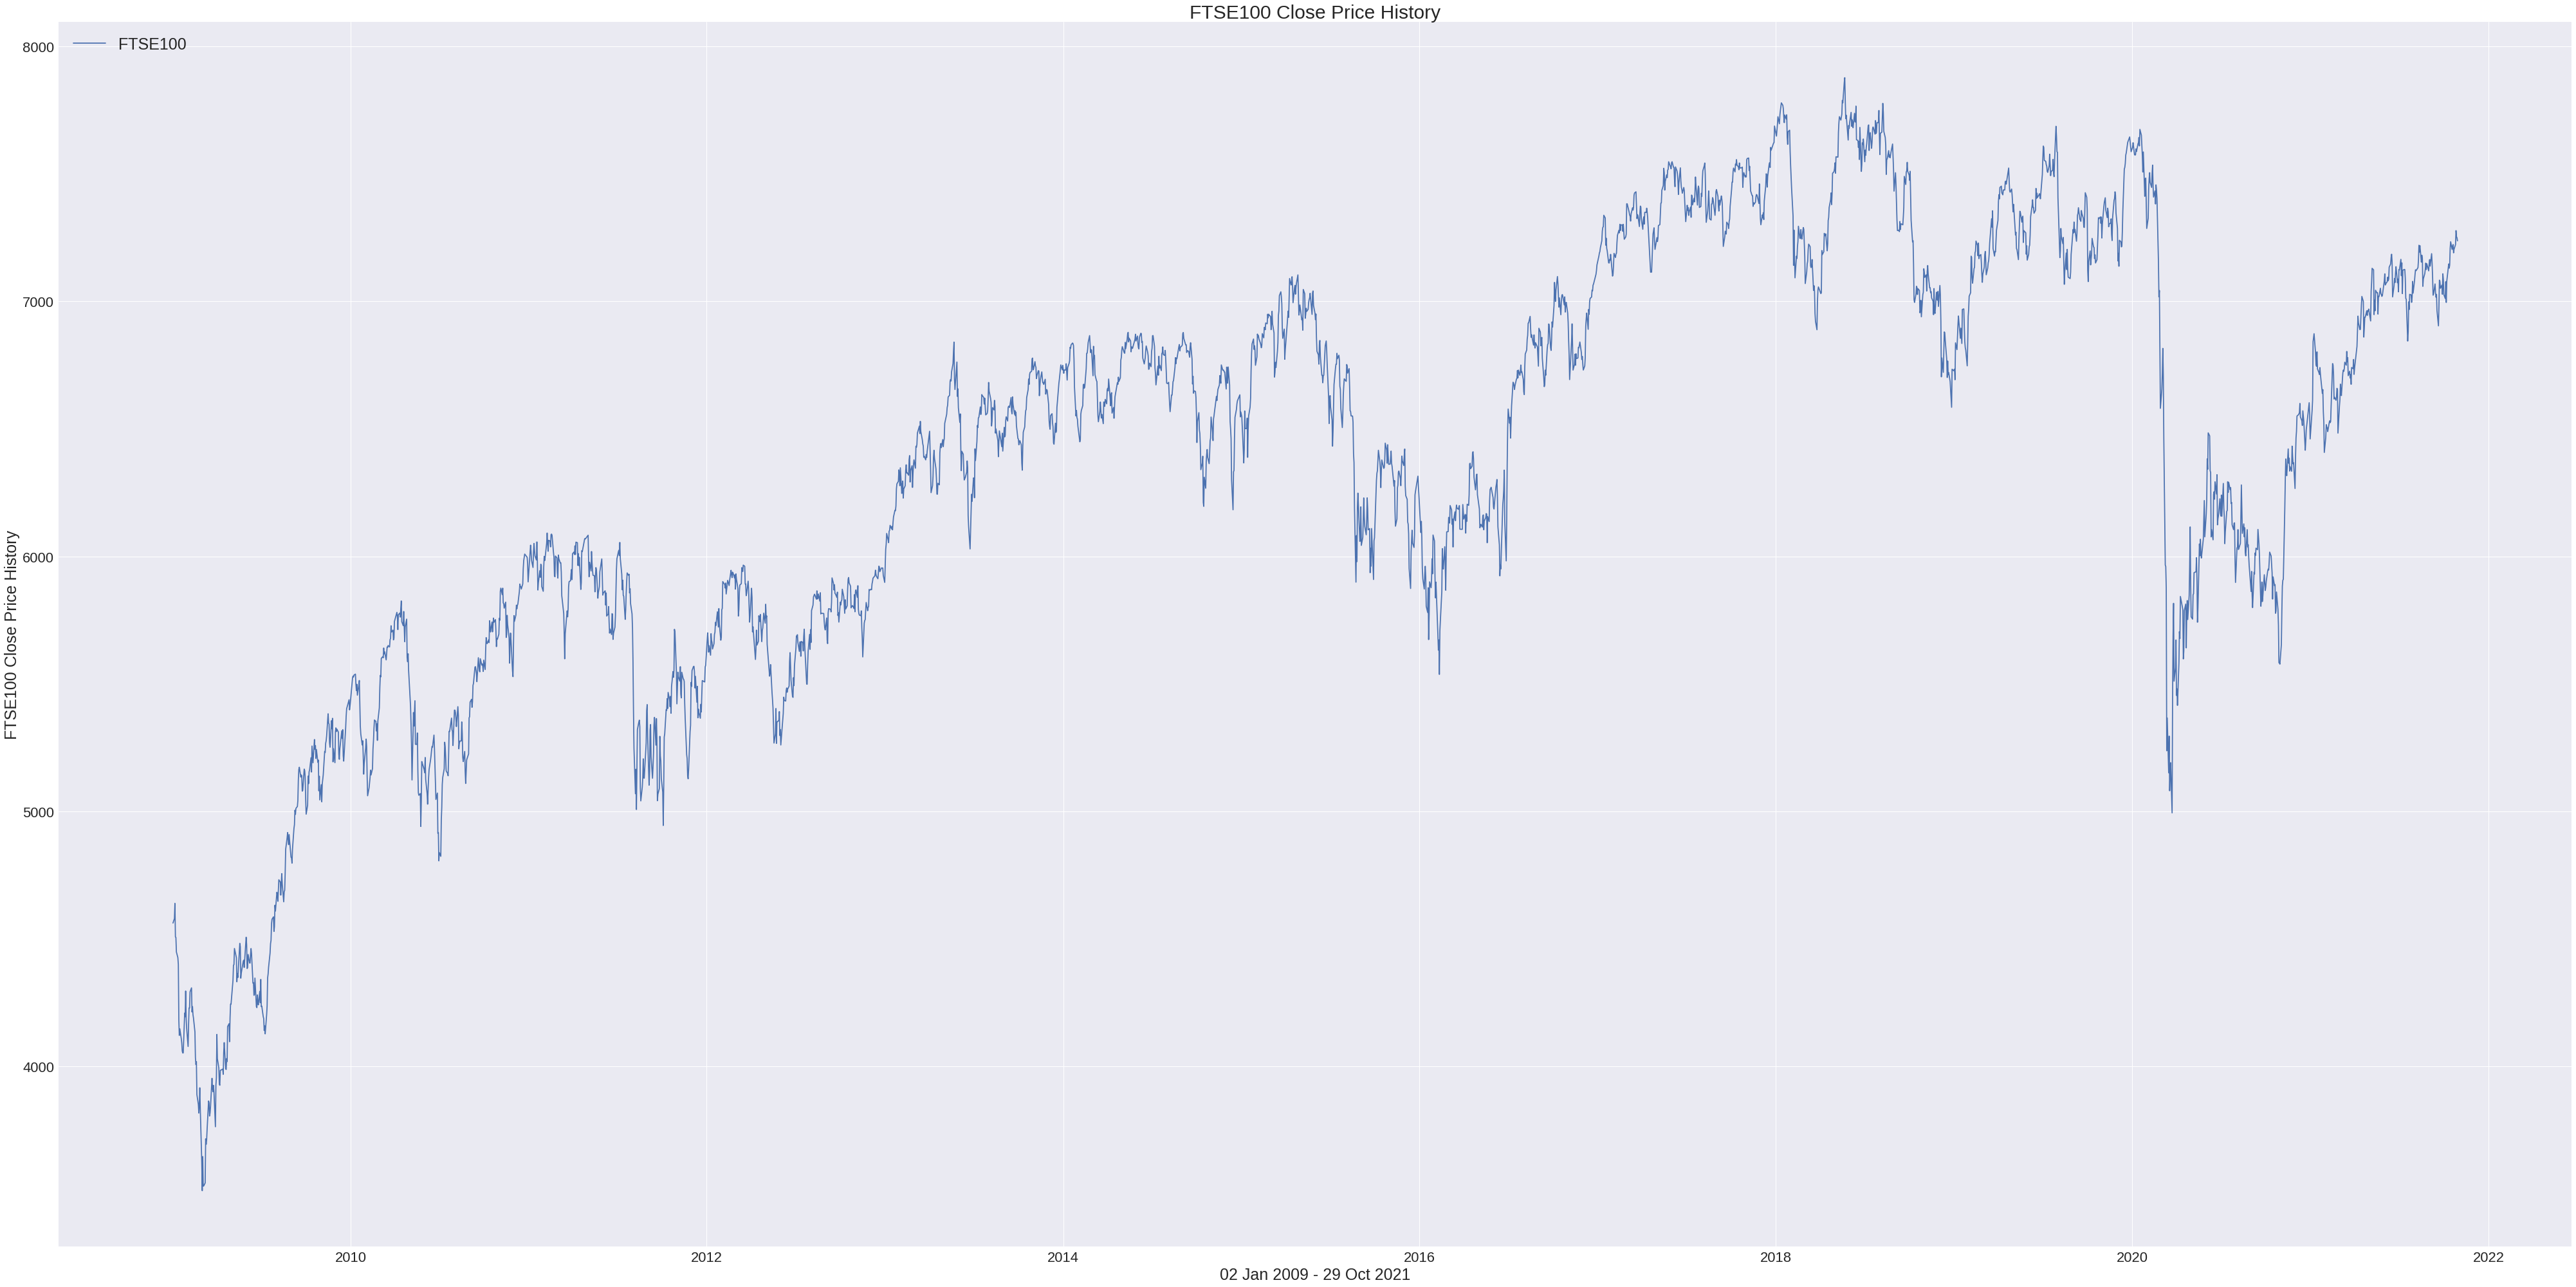

In [69]:
#plot data
plt.figure(figsize = (70, 35))
plt.plot(FTSE100['Close Price'], label = 'FTSE100')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.title('FTSE100 Close Price History', fontsize = 30)
plt.xlabel('02 Jan 2009 - 29 Oct 2021', fontsize = 25)
plt.ylabel('FTSE100 Close Price History', fontsize = 25)
plt.legend(loc = 'upper left', fontsize = 25)
plt.show()

In [70]:
#MACD and Signal Line Indicators
emashort = FTSE100['Close Price'].ewm(span = 12, adjust = False).mean()
emalong = FTSE100['Close Price'].ewm(span = 26, adjust = False).mean()
MACD = emashort - emalong
sig = MACD.ewm(span = 9, adjust = False).mean()

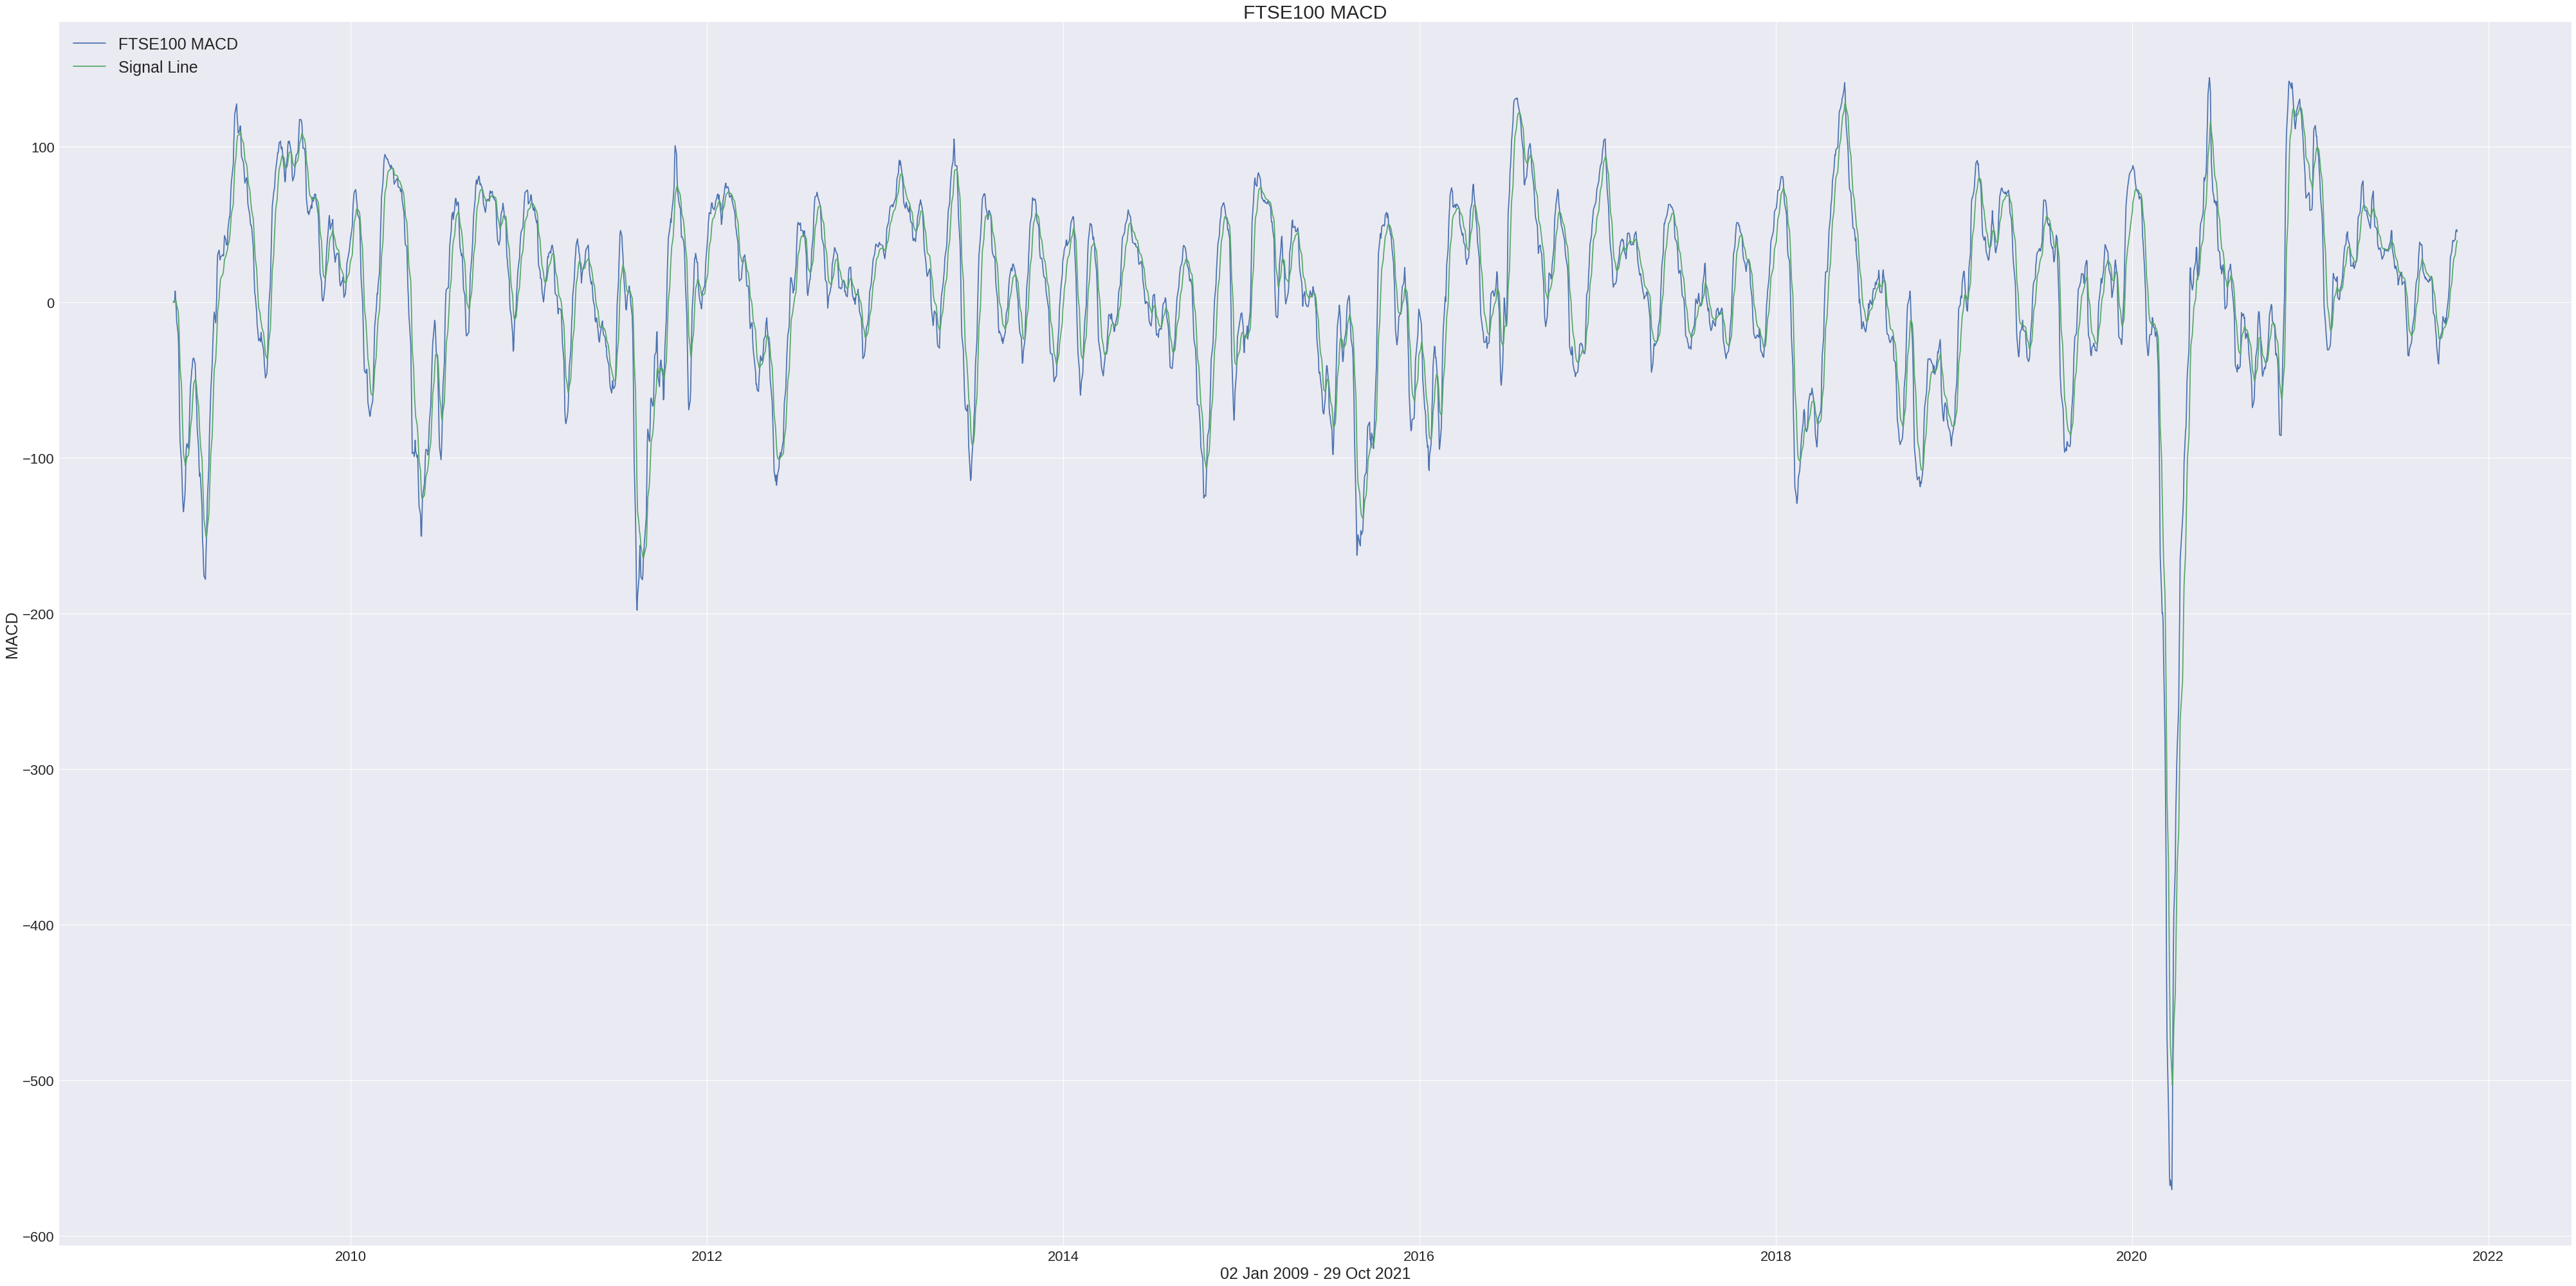

In [71]:
#plot resulting calculations
plt.figure(figsize = (70, 35))
plt.plot(FTSE100.index, MACD, label = 'FTSE100 MACD')
plt.plot(FTSE100.index, sig, label = 'Signal Line')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.title('FTSE100 MACD', fontsize = 30)
plt.xlabel('02 Jan 2009 - 29 Oct 2021', fontsize = 25)
plt.ylabel('MACD', fontsize = 25)
plt.legend(loc = 'upper left', fontsize = 25)
plt.show()

In [72]:
#Adding the MACD and Signal Line data to the Dataframe
FTSE100['MACD'] = MACD
FTSE100['Signal Line'] = sig
FTSE100

,Date,Open Price,Close Price,High Price,Low Price,Volume,MACD,Signal Line
2009-01-02,02-Jan-09,4434.20,4561.80,4561.80,4430.00,407295392,0.000000,0.000000
2009-01-05,05-Jan-09,4561.80,4579.60,4618.10,4520.80,836675968,1.419943,0.283989
2009-01-06,06-Jan-09,4579.60,4638.90,4675.70,4562.00,1037315904,7.246737,1.676538
2009-01-07,07-Jan-09,4638.90,4507.50,4638.90,4478.00,1060111232,1.247253,1.590681
2009-01-08,08-Jan-09,4507.50,4505.40,4514.70,4410.50,924352384,-3.634932,0.545559
...,...,...,...,...,...,...,...,...
2021-10-25,25-Oct-21,7204.55,7222.82,7247.53,7204.55,589120128,40.441236,30.569801
2021-10-26,26-Oct-21,7222.82,7277.62,7281.17,7222.82,670406912,45.246735,33.505188
2021-10-27,27-Oct-21,7277.62,7253.27,7280.45,7247.25,606503744,46.553644,36.114879
2021-10-28,28-Oct-21,7253.27,7249.47,7257.85,7219.71,676321664,46.743916,38.240686


In [73]:
def Signal(inp):
  sigbuy = []
  sigsell = []
  f = -1

  for i in range(len(inp)):
    if inp['MACD'][i] > inp['Signal Line'][i]:
      if f != 1:
        sigbuy.append(inp['Close Price'][i])
        sigsell.append(np.nan)
        f = 1 
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    elif inp['MACD'][i] < inp['Signal Line'][i]:
      if f != 0:
        sigbuy.append(np.nan)
        sigsell.append(inp['Close Price'][i])
        f = 0
      else:
        sigbuy.append(np.nan)
        sigsell.append(np.nan)
    else:
      sigbuy.append(np.nan)
      sigsell.append(np.nan)
  
  return(sigbuy, sigsell)

In [74]:
s = Signal(FTSE100)
FTSE100['Buy Signal Price'] = s[0]
FTSE100['Sell Signal Price'] = s[1]
FTSE100

,Date,Open Price,Close Price,High Price,Low Price,Volume,MACD,Signal Line,Buy Signal Price,Sell Signal Price
2009-01-02,02-Jan-09,4434.20,4561.80,4561.80,4430.00,407295392,0.000000,0.000000,NaN,NaN
2009-01-05,05-Jan-09,4561.80,4579.60,4618.10,4520.80,836675968,1.419943,0.283989,4579.6,NaN
2009-01-06,06-Jan-09,4579.60,4638.90,4675.70,4562.00,1037315904,7.246737,1.676538,NaN,NaN
2009-01-07,07-Jan-09,4638.90,4507.50,4638.90,4478.00,1060111232,1.247253,1.590681,NaN,4507.5
2009-01-08,08-Jan-09,4507.50,4505.40,4514.70,4410.50,924352384,-3.634932,0.545559,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,25-Oct-21,7204.55,7222.82,7247.53,7204.55,589120128,40.441236,30.569801,NaN,NaN
2021-10-26,26-Oct-21,7222.82,7277.62,7281.17,7222.82,670406912,45.246735,33.505188,NaN,NaN
2021-10-27,27-Oct-21,7277.62,7253.27,7280.45,7247.25,606503744,46.553644,36.114879,NaN,NaN
2021-10-28,28-Oct-21,7253.27,7249.47,7257.85,7219.71,676321664,46.743916,38.240686,NaN,NaN


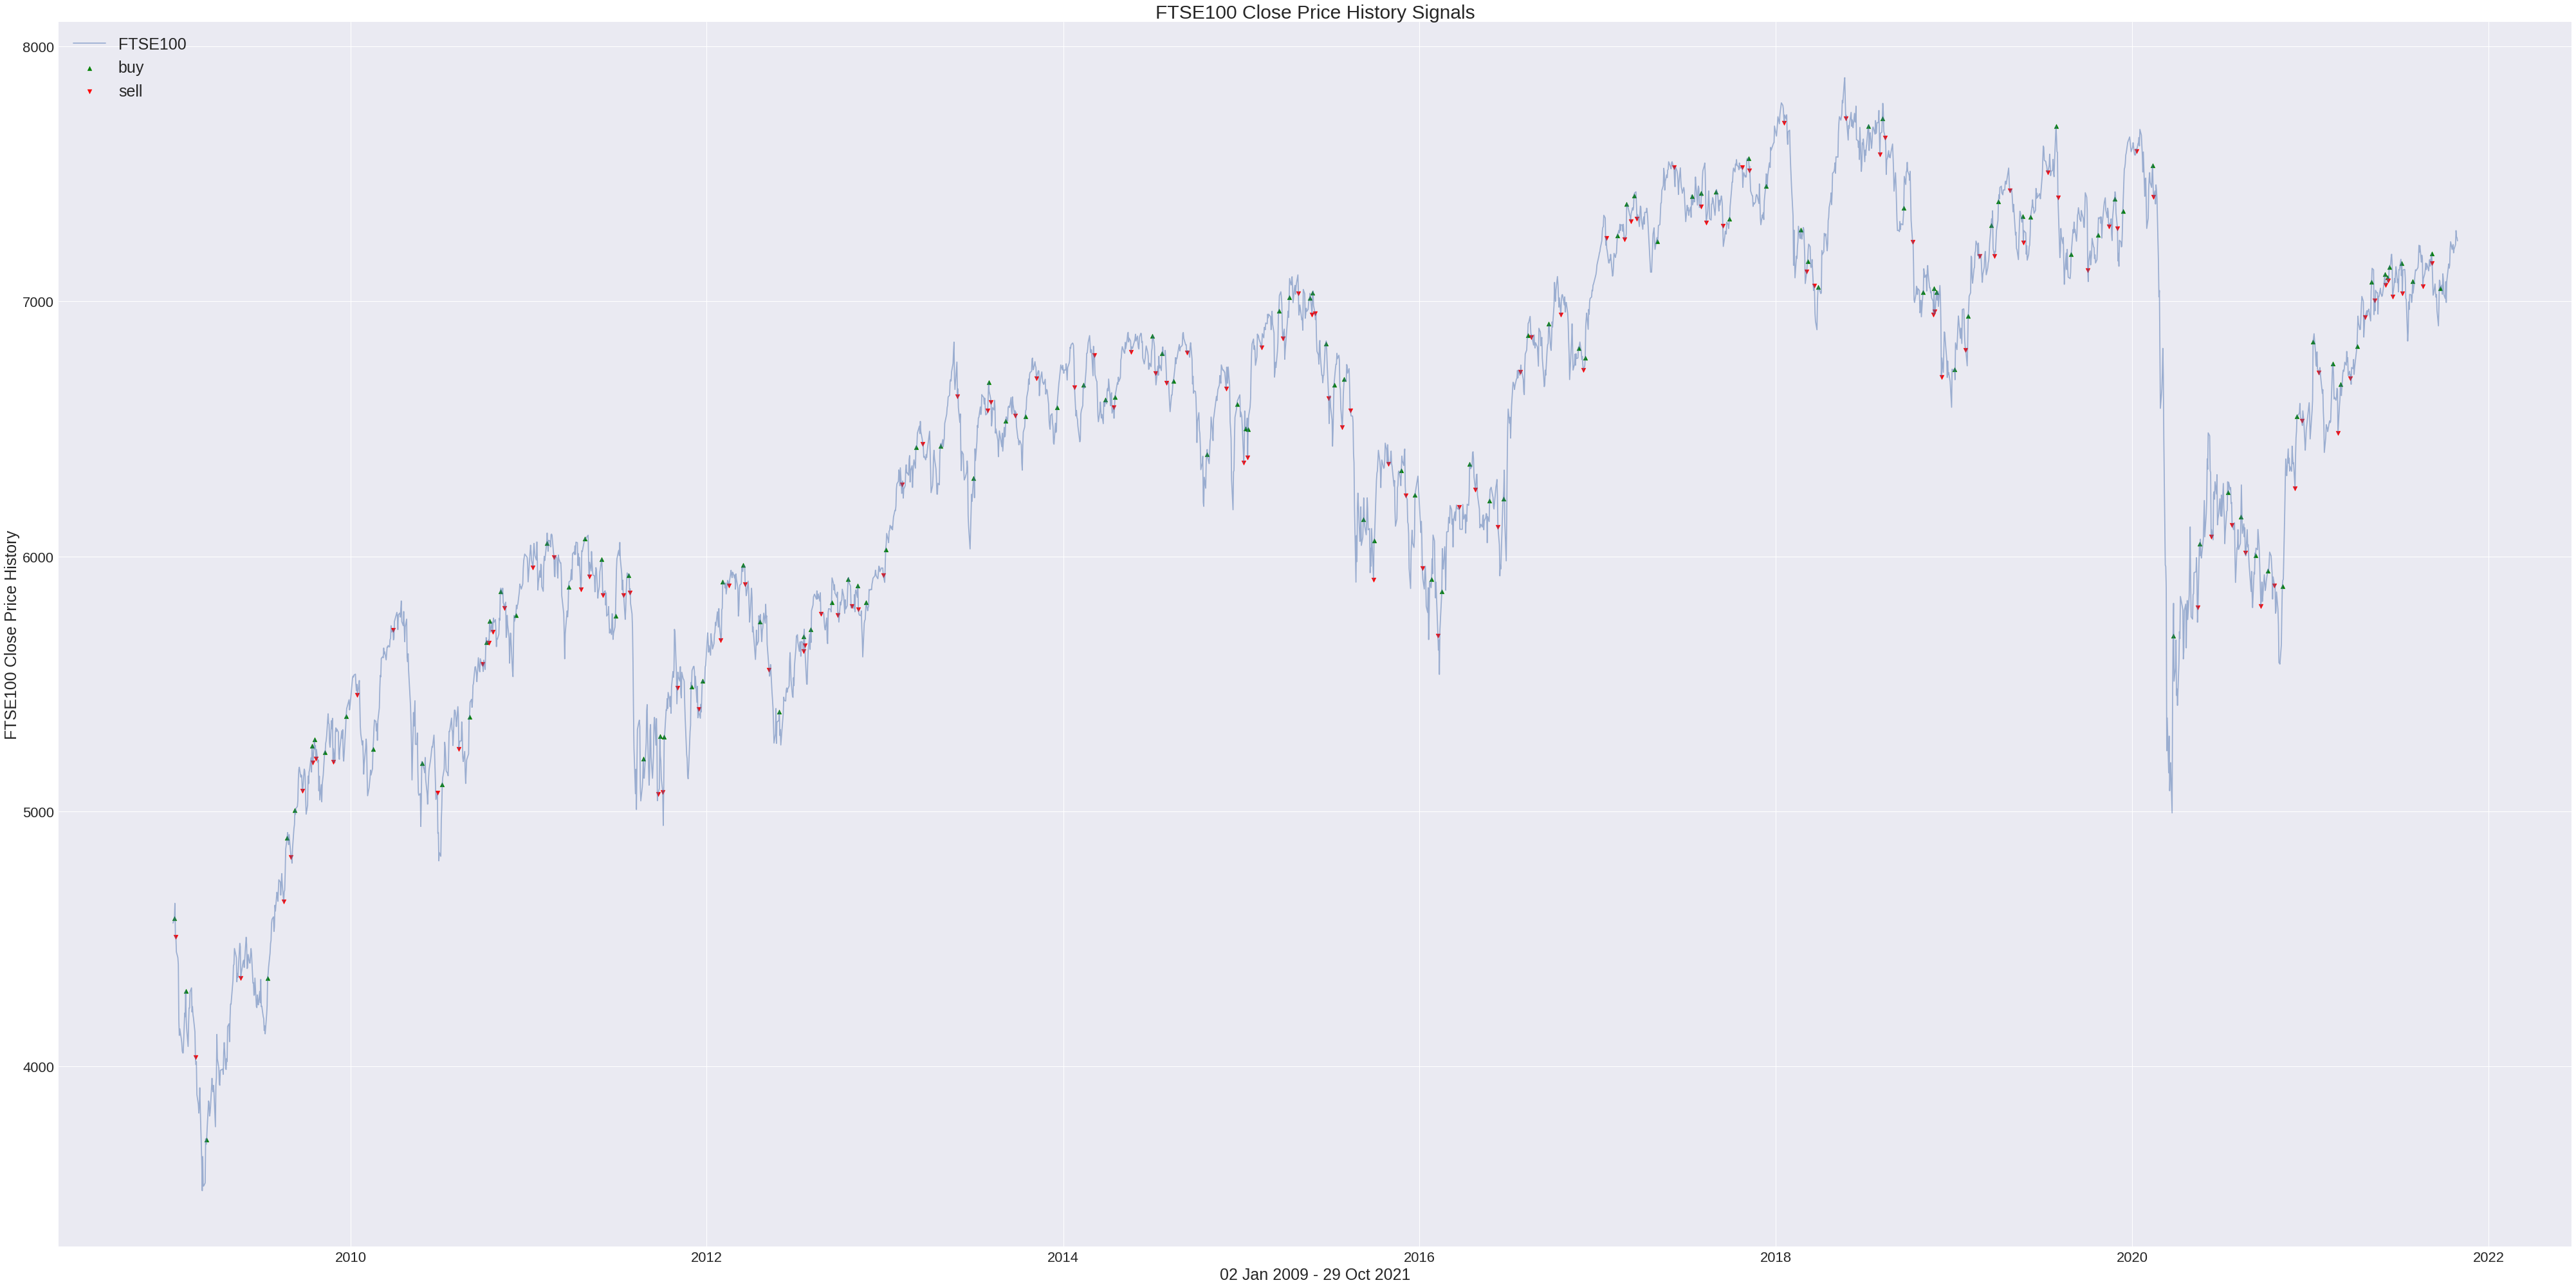

In [75]:
#Plotting Signals onto the FTSE100 Close Price Graph
plt.figure(figsize = (70, 35))
plt.plot(FTSE100['Close Price'], label = 'FTSE100', alpha = 0.5)
plt.scatter(FTSE100.index, FTSE100['Buy Signal Price'], label = 'buy', marker = '^', color = 'green')
plt.scatter(FTSE100.index, FTSE100['Sell Signal Price'], label = 'sell', marker = 'v', color = 'red')
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.title('FTSE100 Close Price History Signals', fontsize = 30)
plt.xlabel('02 Jan 2009 - 29 Oct 2021', fontsize = 25)
plt.ylabel('FTSE100 Close Price History', fontsize = 25)
plt.legend(loc = 'upper left', fontsize = 25)
plt.show()